# Combining the FTT model and the Kenya model. 

Here the two models are loaded and glues together. 

In [43]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [44]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the two models and their dataframes

In [63]:
mken,kenbaseline = model.modelload('pcim/KENmod20230629.pcim',run=1, alfa=0.5,silent=1)

file read:  C:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\pcim\KENmod20230629.pcim


In [64]:
mftt,fttbaseline = model.modelload('pcim/ftt_flex_7.pcim',run=1,silent=1)

file read:  C:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\pcim\ftt_flex_7.pcim


## Now extract the equations

In [67]:
mnew = mken + mftt
baseline = mnew.lastdf
baseline2 = mnew(baseline,2023,2050,silent=1,alfa=0.5,keep='Baseline')

## Create the new model from the combined equations
An the new model should inherit some properties from its parents 

This should later be done as mken+mftt, but not just now. 

In [51]:
print(mnew.model_description)

This model was created by combining the two models:KEN and mftt

        KEN description:
Kenya model from KENmod20230629

        mftt description:
FTT Flex model version 7


In [71]:
mnew.var_description  

{'KENBFBOPTOTLCD': 'Overall Balance of Payments',
 'KENBFCAFCAPTCD': 'Capital Account Balance, US$ mn',
 'KENBFCAFFFDICD': 'Net Foreign Direct Investment, US$ mn',
 'KENBFCAFFINTCD': 'Financial Account Balance, US$ mn',
 'KENBFCAFFINXCD': 'Financial Account (excluding reserves) Balance, US$ mn',
 'KENBFCAFFPFTCD': 'Net Portfolio Investment, US$ mn',
 'KENBFCAFNEOMCD': 'Net Errors and Omissions, US$ mn',
 'KENBFCAFOOTHCD': 'Net Other Other Investment (Other Investment less Net Govt Ext. Borrowing)',
 'KENBFCAFOTHRCD': 'Net Other Investment, US$ mn',
 'KENBFCAFRACGCD': 'Change in Reserve Assets, US$ mn',
 'KENBFFINCABDCD': 'Current Account Deficit',
 'KENBFFINFGAPCD': 'External Financing Gap',
 'KENBFFINNEOMCD': 'Net Errors and Omissions, US$ mn Gross External Borrowing',
 'KENBFFINREQMCD': 'BOP Financing Requirement',
 'KENBFFINSRCSCD': 'BOP Financing Source of Funds',
 'KENBFFINTGOVCD': 'Net External Financing Govt (USD)',
 'KENBMFSTCABTCD': 'Imp., Factor Services and Transfers (BOP), 

In [68]:
mnew.var_groups  

{'Headline': '???GDPpckn ???NRTOTLCN ???LMEMPTOTL ???BFFINCABDCD  ???BFBOPTOTLCD ???GGBALEXGRCN ???BNCABLOCLCD_ ???FPCPITOTLXN',
 'National income accounts': '???NY*',
 'National expenditure accounts': '???NE*',
 'Value added accounts': '???NV*',
 'Balance of payments exports': '???BX*',
 'Balance of payments exports and value added ': '???BX* ???NV*',
 'Balance of Payments Financial Account': '???BF*',
 'General government fiscal accounts': '???GG*',
 'World all': 'WLD*',
 'KEN all': 'KEN*',
 'Production': 'production__*',
 'Hydro': 'production__hy* penal*hydro cost*hydro',
 'Shares': 'share__[!M]* share_total',
 'Cost': 'c_t* cost*',
 'Demand': 'demand*',
 'cost deduction for minimum ': 'deduct*',
 'cost penalty  for maximum ': 'penal*',
 'all': '*'}

## We want to update the combined model
So the Usefuldemand_total is equal to the power demand 

By giving the new equation the name IDENT is can be extracted as a historic model, and 
run in order to calculate the values before the projection time

In [69]:
mkenftt,_ = mnew.equpdate('''
<IDENT> USEFULDEMAND_TOTAL = KENTOTELECQN
<DAMP> KENINDELECXN = KENINDELECXN(-1)*COST_AVERAGE/COST_AVERAGE(-1)
<DAMP> KENRESELECXN = KENRESELECXN(-1)*COST_AVERAGE/COST_AVERAGE(-1)''')


The model:"Combined KEN and mftt" got new equations, new model name is:"Combined KEN and mftt Updated"
New equation for For USEFULDEMAND_TOTAL
Old frml   :new endogeneous variable 
New frml   :FRML <IDENT> USEFULDEMAND_TOTAL = KENTOTELECQN$
Adjust calc:No frml for adjustment calc  

New equation for For KENINDELECXN
Old frml   :FRML <IDENT> KENINDELECXN = KENINDELECXN(-1)*(1+KENELECXCN_) $
New frml   :FRML <DAMP> KENINDELECXN = KENINDELECXN(-1)*COST_AVERAGE/COST_AVERAGE(-1)$
Adjust calc:No frml for adjustment calc  

New equation for For KENRESELECXN
Old frml   :FRML <IDENT> KENRESELECXN = KENRESELECXN(-1)*(1+KENELECXCN_) $
New frml   :FRML <DAMP> KENRESELECXN = KENRESELECXN(-1)*COST_AVERAGE/COST_AVERAGE(-1)$
Adjust calc:No frml for adjustment calc  



## Calculate historic values
and calculate the values 

In [57]:
import modelmf
baseline =tempbaseline.mfcalc(' USEFULDEMAND_TOTAL = KENTOTELECQN')

## Now the model can be solved

In [73]:
res = mkenftt(baseline,2023,2050,silent=1,alfa=0.5)

In [74]:
with mkenftt.set_smpl(2000,2050):    
    display(mkenftt['use* *GGEXPCAPTCN *NYGDPMKTPCN *GGDBTTOTLCN *BNCABFUNDCD KENTOTELECQN'])

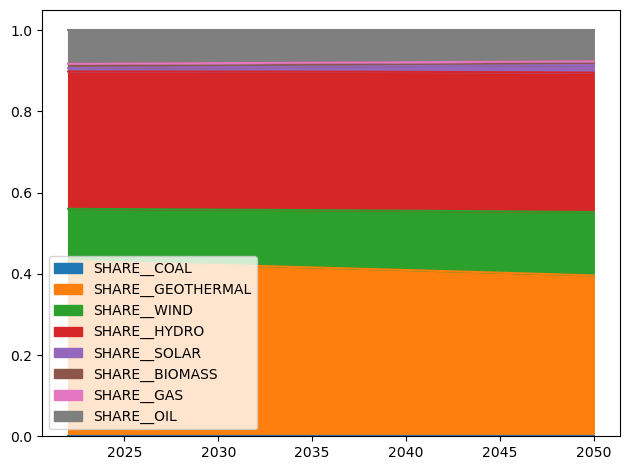

In [75]:
%matplotlib inline
sharenames = [name for name in mftt.endogene if name.startswith('SHARE__') and not ('_M' in name or '_FOSILE' in name or '_TOTAL' in name)]
with mkenftt.set_smpl(2022,2050):    

    mkenftt[sharenames].df.plot.area()

In [61]:
mkenftt.modeldump('pcim/kenftt_7.ftt')
try:
    mkenftt.modeldump('C:/modelflow manual/model_repo/kenftt_7.pcim') # so it can be read from the model repo
except: 
    print('not written to model repo ')

In [62]:
!dir pcim\

 Volume in drive C has no label.
 Volume Serial Number is C2DB-095E

 Directory of c:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\pcim

03-07-2023  09:12    <DIR>          .
03-07-2023  09:09    <DIR>          ..
03-07-2023  00:28           654.637 ftt_flex_7.pcim
03-07-2023  09:12         3.977.706 kenftt_7.ftt
02-07-2023  22:57         3.375.174 KENmod20230629.pcim
               3 File(s)      8.007.517 bytes
               2 Dir(s)  713.610.551.296 bytes free
